In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Assignment #03

This assignment is composed of 2 tasks that your teams is supposed complete.

1. Create a function to remove "blank slices" from a 3D dataset, which in this case consist of a 3D brain magnetic resonance image. "Blank slices" are slices that do not have signal in them. The "blank slices" should be removed across all three dimensions of the 3D volume.
2. Implement our use an existing data augmentation and generation utility for image segmentation applications


The deliverable of this assignment is this jupyter-notebook completed with your solution. 
    - Create a folder assignment-03. Put the jupyter-notebook with your solution in this repository and send the instructor the link. The repository is the same repository that your team created for assignment 1 and your team final project.

You are being assessed based on:

1. Code execution - 20% 
2. Clarity of the code (e.g., easy to follow, has pertinent comments, etc.) - 20%
3. Proper usage of the techniques seen in class - 40% 
4. Quality of the results - 20%

More details about the assessment are available in the rubric document in the class GitHub repository.

## Remove Blank Slices

For this function, remember that a blank slice is different from a slice that does not have the structire you want to segment.

In [91]:
import numpy as np
import nibabel as nib
import matplotlib.pylab as plt


def remove_blank_slices_axis(img,mask, axis_mean, axis):

    mean = axis_mean.mean()
    max = axis_mean.max()
    
    std = axis_mean.std()
    
    # Experimented with different threshold values for each dimension here.
    if axis == 0:
      threshold = mean - .5 * std
      indexes = axis_mean > threshold
    
      img_cropped = img[indexes,:,:]
      mask_cropped = mask[indexes,:,:]
    if axis == 1:
      threshold = mean - .4 * std
      indexes = axis_mean > threshold
    
      img_cropped = img[:,indexes,:]
      mask_cropped = mask[:,indexes,:]
    if axis == 2:
      threshold = mean - .5 * std
      indexes = axis_mean > threshold
    
      img_cropped = img[:,:,indexes]
      mask_cropped = mask[:,:,indexes]
    
    #print(indexes)
    print("Axis mean", round(mean,2), "std", round(std,2), "min", round(axis_mean.min(),2), "max", round(axis_mean.max(),2), "threshold", round(threshold,2))
  
    return img_cropped,mask_cropped

def remove_blank_slices(img,mask):
    axis_mean = np.mean(img, axis=(1,2))
    img_cropped,mask_cropped = remove_blank_slices_axis(img,mask, axis_mean, 0)


    axis_mean = np.mean(img, axis=(0,2))
    img_cropped,mask_cropped = remove_blank_slices_axis(img_cropped,mask_cropped, axis_mean, 1)


    axis_mean = np.mean(img, axis=(0,1))
    img_cropped,mask_cropped = remove_blank_slices_axis(img_cropped,mask_cropped, axis_mean, 2)


    return img_cropped,mask_cropped


Image and mask shapes before cropping
(171, 256, 256) (171, 256, 256)


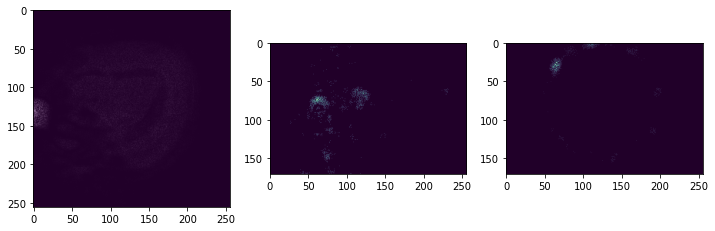

Axis mean 317.78 std 121.49 min 14.1 max 434.71 threshold 257.04
Axis mean 317.78 std 208.14 min 0.17 max 539.99 threshold 234.53
Axis mean 317.78 std 180.63 min 0.06 max 522.67 threshold 227.47


Image and mask shapes after cropping
(127, 168, 185) (127, 168, 185)


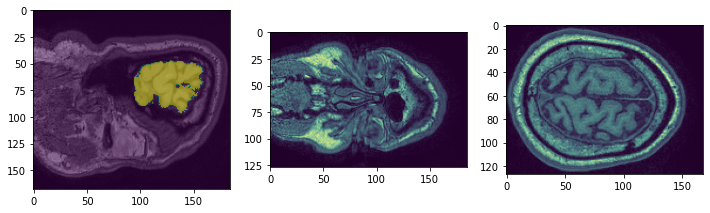

In [92]:
data = nib.load("/content/drive/MyDrive/ENSF619.2/Assignment03/CC0001_philips_15_55_M.nii.gz").get_fdata() 
mask = nib.load("/content/drive/MyDrive/ENSF619.2/Assignment03/CC0001_philips_15_55_M_staple.nii.gz").get_fdata()

print("Image and mask shapes before cropping")
print(data.shape, mask.shape)

# Display original images before cropping.
displayImages(data, mask, midpoint=False)

data_cropped, mask_cropped = remove_blank_slices(data ,mask)

print("\n\nImage and mask shapes after cropping")
print(data_cropped.shape, mask_cropped.shape)

# Display the cropped images.
displayImages(data_cropped, mask_cropped, midpoint=False)


def displayImages(data, mask, midpoint=False):
  x_planeToDisplay = -1
  y_planeToDisplay = -1
  z_planeToDisplay = -1

  if midpoint==True:
    x_planeToDisplay = int(data.shape[0]/2)
    y_planeToDisplay = int(data.shape[1]/2)
    z_planeToDisplay = int(data.shape[2]/2)
  

  plt.figure(figsize = (12,18))

  plt.subplot(1,3,1)
  plt.imshow(data[x_planeToDisplay,:,:], cmap = "gray")
  plt.imshow(mask[x_planeToDisplay,:,:], alpha = 0.5)

  plt.subplot(1,3,2)
  plt.imshow(data[:,y_planeToDisplay,:], cmap = "gray")
  plt.imshow(data[:,y_planeToDisplay,:], alpha = 0.5)

  plt.subplot(1,3,3)
  plt.imshow(data[:,:,z_planeToDisplay], cmap = "gray")
  plt.imshow(data[:,:,z_planeToDisplay], alpha = 0.5)
    
  plt.show()



In [79]:
pip install imgaug


## Data Augmentation and Generation

You can use available utils to propose a solution for this portio nof the assignment.

- [Imgaug](https://imgaug.readthedocs.io/en/latest/)
- [Albumentations](https://albumentations.ai/)
    - Keras. There is a nice tutorial [here](https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly). You can also extend the Data Generation utils we created in class to include data augmentation operations ([here](data_generator.py))

Remember, the essential steps are:
1. Load a batch of images (randomly and from random volumes)
2. Apply a predetrmined set of random data augmentation transformations
3. Crop the images and mask to a specific patch size and return a batch of samples.

In [213]:
pip install imgaug

In [308]:
pip install git+https://github.com/albumentations-team/albumentations

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-11w___94
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-11w___94
     |████████████████████████████████| 47.6 MB 1.2 MB/s 
  Created wheel for albumentations: filename=albumentations-1.1.0-py3-none-any.whl size=103681 sha256=36224a3304d1ab2f8cd1f2cf1b4bf13daae5d07d41b7148c37386b5723103a48
  Stored in directory: /tmp/pip-ephem-wheel-cache-tuphx4sd/wheels/3a/25/ed/ec3b518e7a332d7f0a3bb37c280e1b784cf2f79b94b3c7d00b
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [95]:
import numpy as np
import nibabel as nib
import matplotlib.pylab as plt
from tensorflow import keras
from tensorflow.keras import backend as K
import h5py
import glob

import albumentations as A
import albumentations.augmentations.transforms


class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'

    def __init__(self, imgs_list, masks_list,  patch_size = (128,128), batch_size = 32, shuffle = True):

        self.imgs_list = imgs_list 
        self.masks_list = masks_list
        self.patch_size = patch_size
        self.batch_size = batch_size
        self.nsamples = len(imgs_list)
        self.shuffle = shuffle
        self.on_epoch_end()
        
    def __len__(self):
        'Denotes the number of batches per epoch'
        return len(self.imgs_list)//self.batch_size

    def __getitem__(self, index):
        'Generate one batch of data'

        # Generate indexes of the batch
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        # Generate data
        X, Y = self.__data_generation(batch_indexes)

        return X, Y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(self.nsamples)
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_augmentation(self, img, mask, transform):

        transformed = transform(image=img, mask=mask)
        transformed_image = transformed['image']
        transformed_mask = transformed['mask']
        return transformed_image, transformed_mask

    def __data_generation(self, batch_indexes):
        'Generates data containing batch_size samples'

        # Initialization
        X = np.empty((self.batch_size, self.patch_size[0], self.patch_size[1], 1))
        Y = np.empty((self.batch_size, self.patch_size[0], self.patch_size[1], 1))

        # Image augmentation performed using Albumentation library.
        # Compared to the ImgAug library, Albumentation seemed to be easier to implement.
        # Mask tranformation is also well-documented.
        transform = A.Compose([
          A.ElasticTransform(),
          A.OpticalDistortion(),
          A.HorizontalFlip(p=0.5),
          A.VerticalFlip(p=0.5),
          A.RandomRotate90(),
          A.RandomCrop(width=self.patch_size[0], height=self.patch_size[1]),
        ])
              
        for (jj,ii) in enumerate(batch_indexes):
            
            aux_img = np.load(self.imgs_list[ii])
            aux_mask = np.load(self.masks_list[ii]) 
            
            # Implement data augmentation function

            aux_img_patch,aux_mask_patch = self.__data_augmentation(aux_img, aux_mask, transform)
            
            #Not calling extract_patch here, as we have transformed it in the augmentation phase above.
            #aux_img_patch,aux_mask_patch = self.__extract_patch(aux_img_aug,aux_mask_aug)
           
            X[jj,:,:,0] = aux_img_patch
            Y[jj,:,:,0] = aux_mask_patch

        return X,Y

    def __extract_patch(self, img, mask):
              
        crop_idx = [None]*2
        crop_idx[0] = np.random.randint(0, img.shape[0] - self.patch_size[0])
        crop_idx[1] = np.random.randint(0, img.shape[1] - self.patch_size[1])
        img_cropped =  img[crop_idx[0]:crop_idx[0] + self.patch_size[0],\
                              crop_idx[1]:crop_idx[1] + self.patch_size[1]]
        mask_cropped = mask[ crop_idx[0]:crop_idx[0] + self.patch_size[0], \
                          crop_idx[1]:crop_idx[1] + self.patch_size[1]]
        return img_cropped,mask_cropped


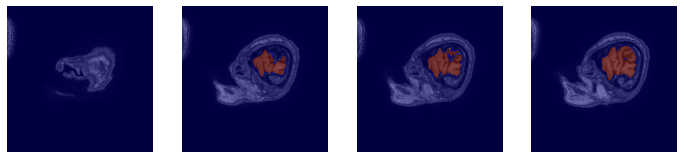

In [ ]:
import glob

imgs_list_train = glob.glob("/content/drive/MyDrive/ENSF619.2/Assignment03/Sample/Images/*.npy")
masks_list_train = glob.glob("/content/drive/MyDrive/ENSF619.2/Assignment03/Sample/Masks/*.npy")

batch_size = 4

xx = np.empty((288, 288, 288))
yy = np.empty((288, 288, 288))

plt.figure(figsize = (12,18))
for ii in range(batch_size):
    xx[ii] = np.load(imgs_list_train[ii])
    yy[ii] = np.load(masks_list_train[ii])

    plt.subplot(1, 4, ii+1)
    plt.imshow(xx[ii], cmap = "gray")
    plt.axis("off")
    plt.imshow(yy[ii], cmap='jet', alpha=0.5, interpolation='none')
    plt.axis("off")
plt.show()


gen_train = DataGenerator(imgs_list_train,masks_list_train,batch_size = batch_size, shuffle=True)
X,Y = gen_train.__getitem__(0)
plt.figure(figsize = (12,18))
for ii in range(batch_size):
    plt.subplot(1, 4, ii+1)
    plt.imshow(X[ii,:,:,0], cmap = "gray")
    plt.axis("off")
    plt.imshow(Y[ii,:,:,0], cmap='jet', alpha=0.5, interpolation='none')
    plt.axis("off")
plt.show()
